In [1]:
acc_names = ["acc_baseline","acc_baseline_wavelet","acc_baseline_crop",
             "acc_baseline_crop_wavelet","acc_augmented", "acc_augmented_wav"]
cm_names = ["cm_baseline","cm_baseline_wavelet","cm_baseline_crop",
            "cm_baseline_crop_wavelet","cm_augmented", "cm_augmented_wav"]
classes = ['air_conditioner',
'car_horn',
'children_playing',
'dog_bark',
'drilling',
'engine_idling',
'gun_shot',
'jackhammer',
'siren',
'street_music']

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

acc = []
cm = []

for filename in acc_names:
    file = np.load(filename+".npy", allow_pickle = True)
    acc.append(file)
for filename in cm_names:
    file = np.load(filename+".npy", allow_pickle = True)
    cm.append(file)

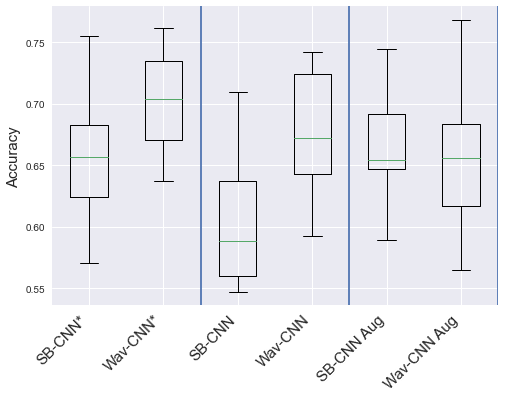

In [3]:
plt.style.use("seaborn")
labels= ["SB-CNN*", "Wav-CNN*",
         "SB-CNN", "Wav-CNN",
        "SB-CNN Aug", "Wav-CNN Aug",
        ]
plt.boxplot(acc, labels=labels)
for line_pos in [2.5, 4.5, 6.5]:
    plt.axvline(x=line_pos)
plt.ylabel("Accuracy", fontsize=15)
plt.xticks(rotation=45, fontsize=15, horizontalalignment='right')
plt.savefig('accuracies.png',bbox_inches='tight')

In [4]:
cm_dict = dict(zip(labels, cm))

In [5]:
def plot_cm_comparison(label1, label2):
    #plot cm of label1 and difference with cm of label2
    cm = cm_dict[label1]
    df_cm = pd.DataFrame(cm, index = classes,
                      columns = classes)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=True,  fmt='d')
    plt.yticks(fontsize=15)
    plt.xticks(rotation=45, fontsize=15, horizontalalignment='right')
    plt.title(label1, fontsize=15)
    plt.savefig(label1.replace("*","_multi")+'.png',bbox_inches='tight')
    
    cm = cm_dict[label2]-cm_dict[label1]
    df_cm = pd.DataFrame(cm, index = classes, columns = classes)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=True,  fmt='d')
    
    plt.yticks(fontsize=15)
    plt.xticks(rotation=45, fontsize=15, horizontalalignment='right')
    plt.title(label2 +" ~ "+label1, fontsize=15)
    plt.savefig(label1.replace("*","_multi")+"_vs_"+label2.replace("*","_multi")+'.png',bbox_inches='tight')
    

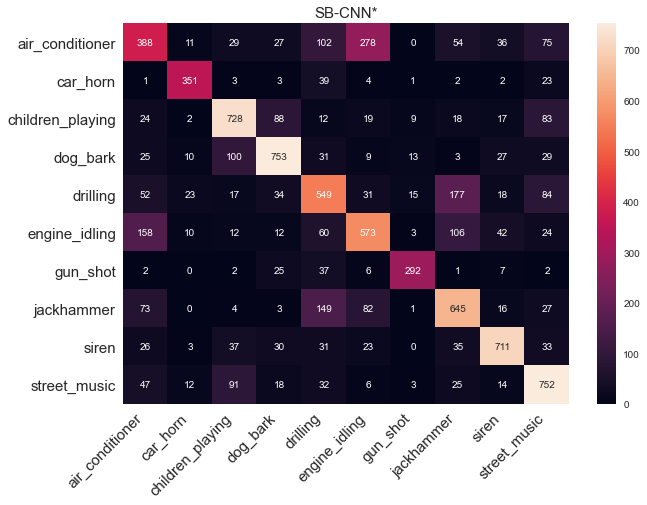

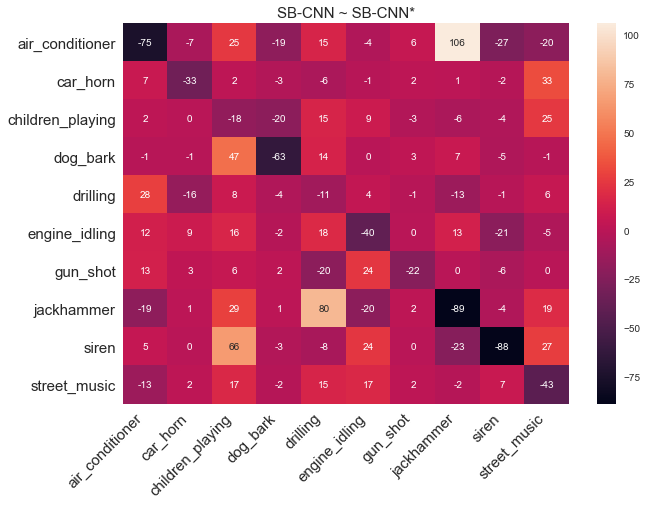

In [6]:
# baseline multi vs baseline
plot_cm_comparison("SB-CNN*" , "SB-CNN")

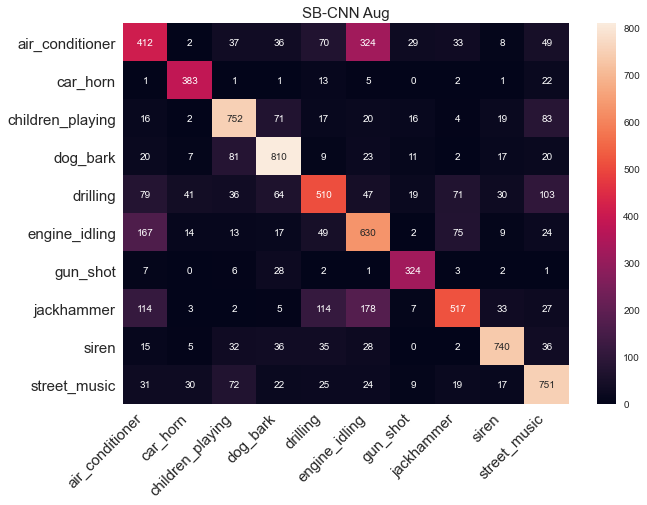

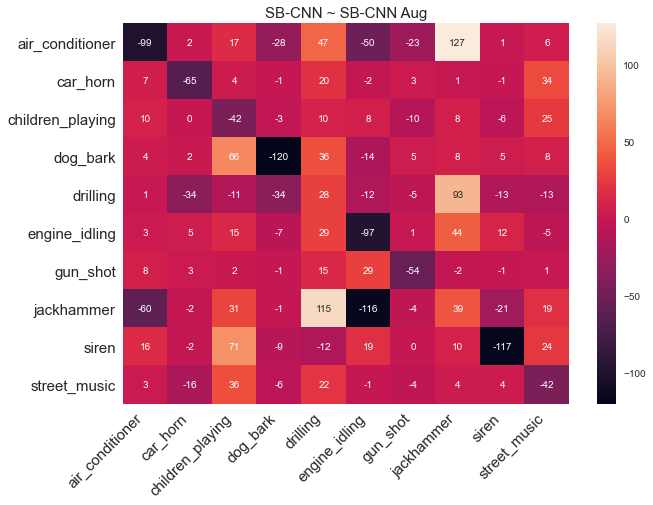

In [7]:
# baseline vs augmented
plot_cm_comparison("SB-CNN Aug", "SB-CNN")

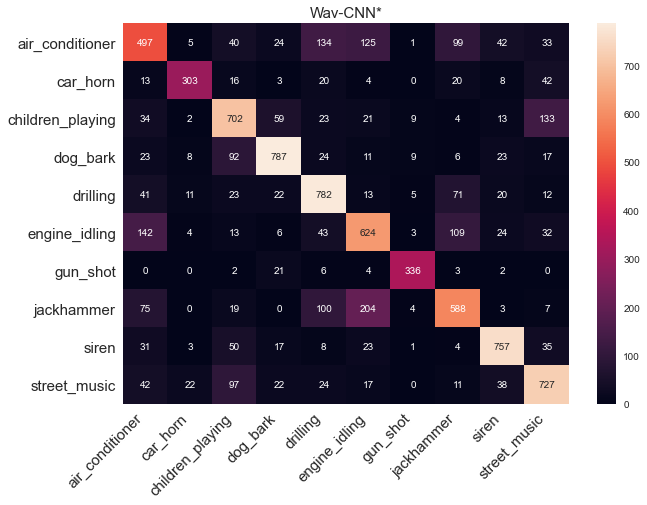

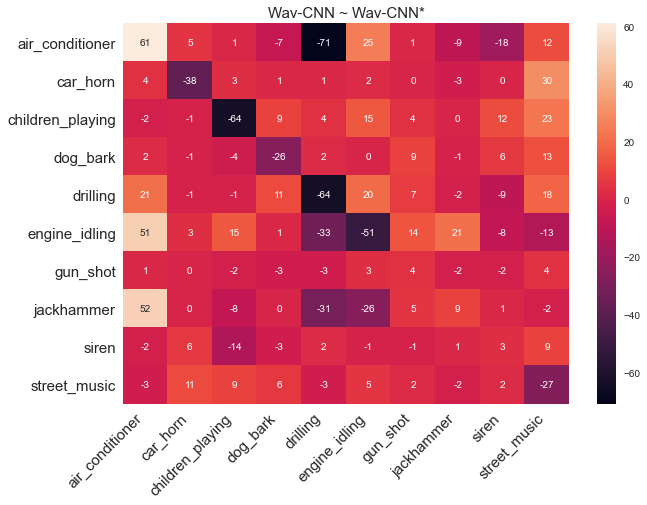

In [8]:
# baseline multi wavelet vs baseline wavelet
plot_cm_comparison("Wav-CNN*", "Wav-CNN")

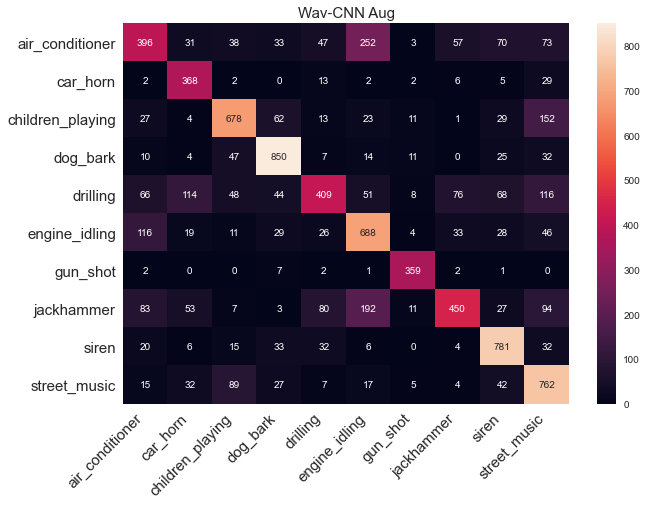

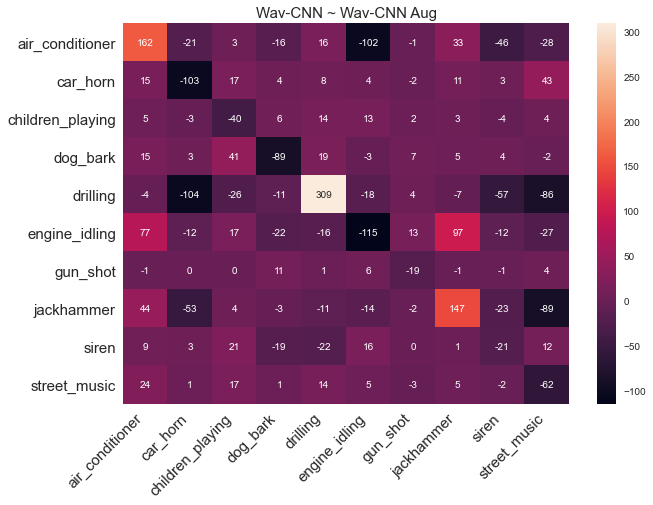

In [9]:
# baseline wav vs augmented wav
plot_cm_comparison("Wav-CNN Aug", "Wav-CNN")

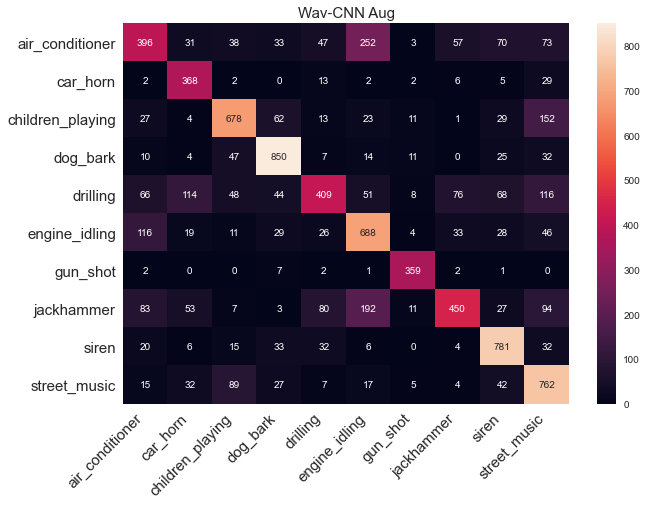

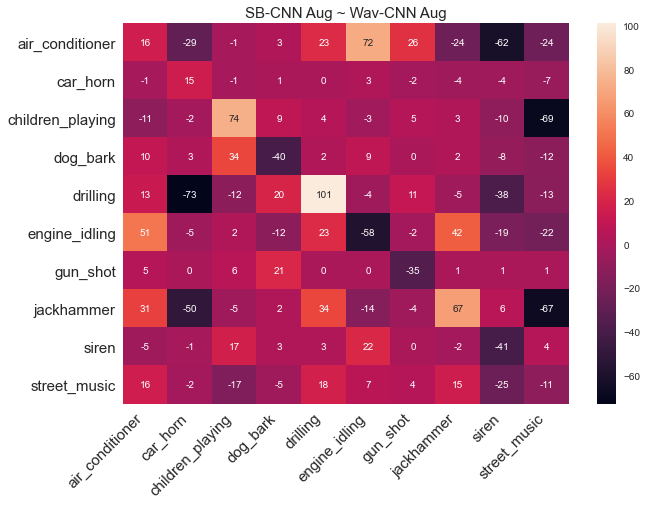

In [10]:
# augmented wav vs augmented
plot_cm_comparison("Wav-CNN Aug", "SB-CNN Aug")